## Importing essential lib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import json

In [3]:
fpl2020_file = open('FPL_2019_20_season_stats.jscsrc', encoding="utf8")
fpl2020 = fpl2020_file.read()
fpl2020 = json.loads(fpl2020)
fpl2021_file = open('FPL_2020_21_player_list.jscsrc')
fpl2021 = fpl2021_file.read()
fpl2021 = json.loads(fpl2021)
teams2020 = pd.DataFrame(fpl2020['teams'])
players2020 = pd.DataFrame(fpl2020['elements'])

In [4]:
fifa2020 = pd.read_csv("FIFA20_official_data.csv")

## Data understanding 

In [5]:
teams2020.shape

(20, 21)

In [6]:
players2020.shape

(666, 61)

In [7]:
fifa2020.shape

(17104, 65)

In [8]:
fifa2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17104 entries, 0 to 17103
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17104 non-null  int64  
 1   Name                      17104 non-null  object 
 2   Age                       17104 non-null  int64  
 3   Photo                     17104 non-null  object 
 4   Nationality               17104 non-null  object 
 5   Flag                      17104 non-null  object 
 6   Overall                   17104 non-null  int64  
 7   Potential                 17104 non-null  int64  
 8   Club                      16716 non-null  object 
 9   Club Logo                 17104 non-null  object 
 10  Value                     17104 non-null  object 
 11  Wage                      17104 non-null  object 
 12  Special                   17104 non-null  int64  
 13  Preferred Foot            17104 non-null  object 
 14  Intern

In [9]:
fifa2020.drop(['ID','Photo','Flag','Club Logo','Real Face'],axis=1,inplace=True)

In [10]:
fifa2020.shape

(17104, 60)

In [11]:
fifa2020['Preferred Foot'].unique()

array(['Right', 'Left'], dtype=object)

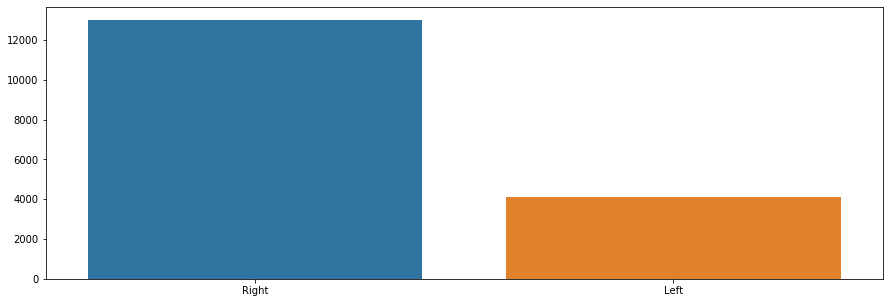

In [12]:
fifa_foot = fifa2020['Preferred Foot'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(fifa_foot.index,fifa_foot.values)
plt.show()

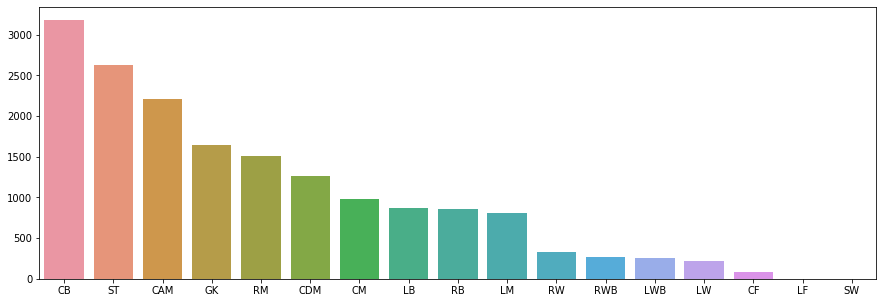

In [13]:
fifa_bposition = fifa2020['Best Position'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(fifa_bposition.index,fifa_bposition.values)
plt.show()

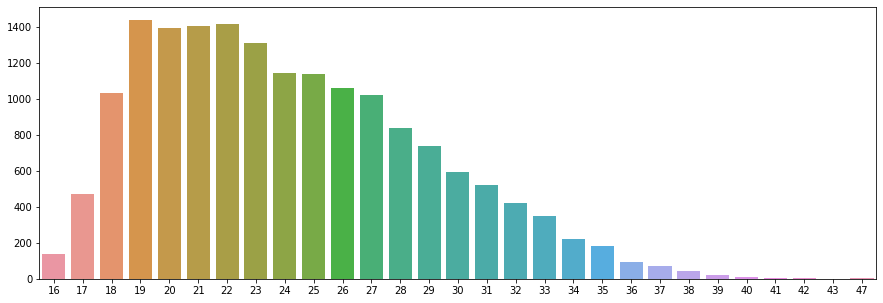

In [14]:
fifa_age = fifa2020['Age'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(fifa_age.index,fifa_age.values)
plt.show()

In [15]:
fifa_overall = fifa2020.sort_values(['Overall'],ascending=False)[:10]
fifa_overall[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='Blues')

,Name,Overall,Potential,Club,Preferred Foot,Position
11,L. Messi,94,94,FC Barcelona,Left,RW
21,Cristiano Ronaldo,93,93,Juventus,Right,LS
62,Neymar Jr,92,92,Paris Saint-Germain,Right,LW
3,K. De Bruyne,91,91,Manchester City,Right,RCM
13777,J. Oblak,91,93,Atlético Madrid,Right,GK
69,R. Lewandowski,91,91,FC Bayern München,Right,ST
201,V. van Dijk,91,92,Liverpool,Right,LCB
120,E. Hazard,91,91,Real Madrid,Right,SUB
161,S. Agüero,90,90,Manchester City,Right,ST
30,M. Salah,90,90,Liverpool,Left,RW


In [16]:
fifa_potential = fifa2020.sort_values(['Potential'],ascending=False)[:10]
fifa_potential[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='Blues')

,Name,Overall,Potential,Club,Preferred Foot,Position
136,K. Mbappé,89,95,Paris Saint-Germain,Right,LS
1100,J. Sancho,86,94,Borussia Dortmund,Right,RF
11,L. Messi,94,94,FC Barcelona,Left,RW
21,Cristiano Ronaldo,93,93,Juventus,Right,LS
13777,J. Oblak,91,93,Atlético Madrid,Right,GK
529,João Félix,80,93,Atlético Madrid,Right,LS
13260,M. ter Stegen,90,93,FC Barcelona,Right,GK
570,K. Havertz,84,93,Bayer 04 Leverkusen,Left,RF
14828,G. Donnarumma,85,92,Milan,Right,GK
11234,09 L. Hoedemaker,78,92,111648,Right,SUB


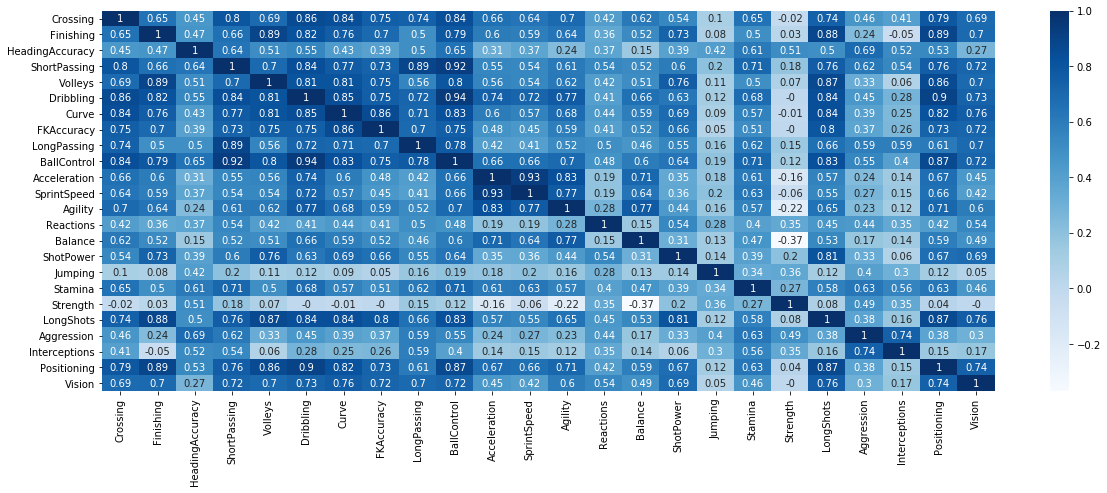

In [17]:
fifa3 = fifa2020[['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision']]
plt.figure(figsize=(20,7))
sns.heatmap(round(fifa3.corr(),2),annot=True,cmap='Blues')
plt.show()